# Статистика, DS-поток
## Задание S.9

**Правила:**

* Дедлайны см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Выполненную работу нужно отправить телеграм-боту `@miptstats_ds23_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. Дождитесь подтверждения от бота, что он принял файл. Если подтверждения нет, то что-то не так. **Работы, присланные иным способом, не принимаются.**
* Дедлайны см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно **ноутбук в формате `ipynb`**.
* Следите за размером файлов. **Бот не может принимать файлы весом более 20 Мб.** Если файл получается больше, заранее разделите его на несколько.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания получат штраф.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*
* В каждой задаче не забывайте делать **пояснения и выводы**.
* **Код из рассказанных на занятиях ноутбуков** можно использовать без ограничений.



**Правила оформления теоретических задач:**

* Решения необходимо прислать одним из следующих способов:
  * фотографией в правильной ориентации, где все четко видно, а почерк разборчив,
    * отправив ее как файл боту вместе с ноутбуком *или*
    * вставив ее в ноутбук посредством `Edit -> Insert Image` (<font color="red">фото, вставленные ссылкой, не принимаются</font>);
  * в виде $\LaTeX$ в markdown-ячейках.
* Решения не проверяются, если какое-то требование не выполнено. Особенно внимательно все проверьте в случае выбора второго пункта (вставки фото в ноутбук). <font color="red"><b>Неправильно вставленные фотографии могут не передаться при отправке.</b></font> Для проверки попробуйте переместить `ipynb` в другую папку и открыть его там.
* В решениях поясняйте, чем вы пользуетесь, хотя бы кратко. Например, если пользуетесь независимостью, то достаточно подписи вида "*X и Y незав.*"
* Решение, в котором есть только ответ, и отсутствуют вычисления, оценивается в 0 баллов.


**Баллы за задание.**

Теория:
* Задача T1 &mdash; 30 баллов;
* Задача T2 &mdash; 10 баллов;
* Задача T3 &mdash; 10 баллов;

Практика:
* Задача P1 &mdash; 70 баллов;
* Задача P2 &mdash; 50 баллов;
* Задача P3 &mdash; 50 баллов;
* Задача P4 &mdash; 10 баллов;
* Задача P5 &mdash; 30 баллов.

Задачи разных типов учитываются в разных рейтингах.

**Важность задач:**

* *высокая:* задачи T1, P1-P4;
* *средняя:* задача T2, P5;
* *обычная:* задача T3.

Задачи расставлены в том порядке, в котором их наиболее логично выполнять.

In [ ]:
# Bot check

# HW_ID: ds_s9
# Бот проверит этот ID и предупредит, если случайно сдать что-то не то.

# Status: not final
# Перед отправкой в финальном решении удали "not" в строчке выше.
# Так бот проверит, что ты отправляешь финальную версию, а не промежуточную.
# Никакие значения в этой ячейке не влияют на факт сдачи работы.

In [2]:
import numpy as np
import pandas as pd
import scipy.stats as sps
from tqdm.notebook import tqdm

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid', font_scale=1.3, palette='Set2')

_____
### Задача P1.

Вспомним задачу из предыдущего практического задания. Напомним формулировку.

Пусть $X_1, ..., X_n \sim Bern(p)$ &mdash; результаты работы модели на тестовой выборке, где $X_i = 1$, если для $i$-го объекта модель правильно определила класс, а $p$ &mdash; неизвестная вероятность такого события. 
Мы хотим проверить гипотезу $\mathsf{H}_0\colon p=1/2$ против альтернативы $\mathsf{H}_1\colon p>1/2$. Нулевая гипотеза означает, что построенный классификатор выдает рандомный ответ, а первая &mdash; что чаще все же выдает верный ответ.

Укажите равномерно наиболее мощный критерий и определите для него p-value.

**Ответ:**
____
Известно, что $S = \left\{T(X) \geqslant c_\alpha\right\}$, где $T(X) = \sum_{i=1}^n X_i$, является равномерно наиболее мощным критерием для проверки этой гипотезы.

Критическое значение $c_\alpha = u_{1-\alpha} + 1$ (см. предыдущее домашнее задание).

Величина p-value определяется как $p(t) = \mathsf{P}_{0.5}(T(X) \geqslant t)$, где $t = \sum_{i=1}^n x_i$ &mdash; реализация статистики $T(X)$. Здесь важен нестрогий знак. В определении p-value говорится: *такое же* или еще более экстремальное.
____

Проведите несколько экспериментов аналогично предыдущему заданию, дополнив таблицу значениями p-value.

*Замечание:* Пользуйтесь функциями из `scipy.stats`. Внимательно проверьте правильность строгих и нестрогих знаков.

In [3]:
sns.set(font_scale=1.8, palette='Set2')
sns.set_style('darkgrid')

In [4]:
alpha = 0.05  # уровень значимости
table = []  # таблица для экспериментов

for size, t in zip([5, 10, 20, 30, 50], [4, 5, 15, 20, 20]):
    # критическое значение
    c_alpha = sps.binom(n=size, p=0.5).ppf(1 - alpha) + 1
    # pvalue, здесь -0.5 гарантирует, что берем нестрогий знак
    p_value = sps.binom(n=size, p=0.5).sf(t - 0.5)
    # добавляем результаты в таблицу
    table.append([size, t, c_alpha, p_value, p_value < alpha])
    
pd.DataFrame(table, columns=['size','T(x)','c_alpha','pvalue','rejected'])

,size,T(x),c_alpha,pvalue,rejected
0,5,4,5.0,0.187500,False
1,10,5,9.0,0.623047,False
2,20,15,15.0,0.020695,True
3,30,20,20.0,0.049369,True
4,50,20,32.0,0.940540,False


Представьте себя заказчиком. Каким должно быть истинное значение $p$, чтобы с точки зрения практики можно было бы считать, что связь между черным котом и неудачей имеется? 

**Ответ:** 
___
С точки зрения практики можем считать, например, что если $p \geqslant 0.6$, то связь есть. Вообще говоря, пороговое значение должно выбираться отдельно для каждой задачи.
___

Традиционный вопрос заказчика &mdash; сколько необходимо провести экспериментов? Заказчик не хочет долго ждать, но хочет, чтобы у вашего критерия была достаточная мощность.

Для начала сгенерируйте 10 выборок для двух случаев: 
1. $n=5, p=0.75$; 
2. $n=10^5, p=0.51$. 

В каждом случае в виде таблицы выведите 
* реализацию статистики $T(X)$,
* соответствующее p-value,
* 0/1 &mdash; отвергается ли $\mathsf{H}_0$ (выводите 1, если отвергается).

**Первый случай.**

In [5]:
size = 5  # размер выборки
p = 0.75  # истинное значение p
table = []  # таблица для экспериментов

for _ in range(10):
    # генерация выборки и подсчет статистики
    t = sps.bernoulli(p=p).rvs(size=size).sum()
    #pvalue, здесь  -0.5 гарантирует, что берем нестрогий знак
    p_value = sps.binom(n=size, p=0.5).sf(t-0.5)
    table.append([t, p_value, p_value < alpha])
    
pd.DataFrame(table, columns=['T(x)','pvalue','rejected'])

,T(x),pvalue,rejected
0,5,0.03125,True
1,1,0.96875,False
2,5,0.03125,True
3,4,0.18750,False
4,4,0.18750,False
5,5,0.03125,True
6,4,0.18750,False
7,5,0.03125,True
8,5,0.03125,True
9,5,0.03125,True


**Второй случай.**

In [6]:
size = 10 ** 5
p = 0.51
table = []

for _ in range(10):
    t = sps.bernoulli(p=p).rvs(size=size).sum()
    # -0.5 гарантирует, что берем нестрогий знак
    p_value = sps.binom(n=size, p=0.5).sf(t-0.5)
    table.append([t, p_value, p_value < alpha])
    
pd.DataFrame(table, columns=['T(x)','pvalue','rejected'])

,T(x),pvalue,rejected
0,50985,2.381495e-10,True
1,50902,5.929658e-09,True
2,51319,3.733340e-17,True
3,50991,1.868058e-10,True
4,51092,2.536465e-12,True
5,50845,4.616424e-08,True
6,51108,1.237352e-12,True
7,51107,1.294508e-12,True
8,51139,2.992765e-13,True
9,50763,7.086266e-07,True


**Вывод:** Если выборка мала, то даже при сильном отклонении от основной гипотезы сложно что-либо отвергуть. При большой выборке даже при малом отклонении от основной гипотезы она отвергается практически всегда.

Теперь разберемся с тем, как подобрать оптимальный размер выборки.

1. Зафиксируйте значение $p^* > 1/2$, которое на практике обычно называется *минимальным детектируемым эффектом*. Оно должно обладать следующими свойствами.
    - Если истинное $p > p^*$, то такое отклонение от $1/2$ с практической точки зрения признается существенным, то есть новая модель действительно работает лучше.
    - В противном случае отклонение с практической точки зрения признается несущественным.
2. Для некоторых $n$ постройте графики функции мощности критерия при $1/2 < p < 1$ и уровне значимости 0.05.
3. Выберите такое $n^*$, для которого функция мощности дает значение 0.8 при $p^*$.

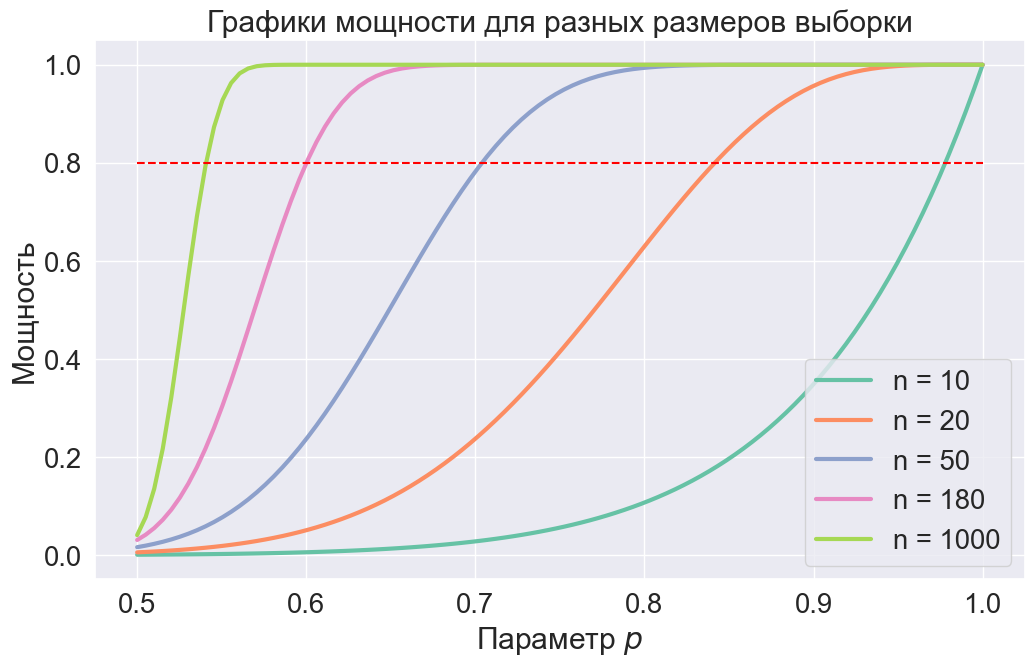

In [7]:
alpha = 0.05  # уровень значимости
# сетка для 1/2 < p < 1
alternative_p = np.linspace(0.5, 1, 100)

plt.figure(figsize=(12, 7))
# цикл по размерам выборок
for size in [10, 20, 50, 180, 1000]:
    # c_alpha
    c = sps.binom(n=size, p=0.5).ppf(1 - alpha) + 1
    # подсчет мощности и отрисовка
    power = sps.binom(n=size, p=alternative_p).sf(c)
    plt.plot(alternative_p, power, label='n = %d'%size, lw=3)
    

plt.hlines(0.8, 0.5, 1, 'r', '--')

plt.title('Графики мощности для разных размеров выборки')    
plt.xlabel('Параметр $p$')
plt.ylabel('Мощность')
plt.legend()
plt.show()

Для выбранного $n^*$ проведите эксперимент, аналогичный проведенным ранее экспериментам, сгенерировав выборки для следующих истинных значений $p$: 
 1. $1/2 < p < p^*$; 
 2. $p > p^*$.

**Первый случай.** $1/2 < p < p^*$, рассмотрим $p=0.55$.

In [8]:
size = 180  # размер выборки
p = 0.55  # p > p*
table = []  # таблица для экспериментов

for _ in range(10):
    # генерация выборки и подсчет статистики
    t = sps.bernoulli(p=p).rvs(size=size).sum()
    #pvalue, здесь  -0.5 гарантирует, что берем нестрогий знак
    p_value = sps.binom(n=size, p=0.5).sf(t-0.5)
    table.append([t, p_value, p_value < alpha])
    
pd.DataFrame(table, columns=['T(x)','pvalue','rejected'])

,T(x),pvalue,rejected
0,96,0.206175,False
1,102,0.043094,True
2,104,0.021936,True
3,96,0.206175,False
4,93,0.354750,False
5,99,0.102496,False
6,102,0.043094,True
7,105,0.015185,True
8,99,0.102496,False
9,85,0.793825,False


**Второй случай.** $p > p^*$, рассмотрим $p=0.65$.

In [9]:
size = 180  # размер выборки
p = 0.65  # p > p*
table = []  # таблица для экспериментов

for _ in range(10):
    # генерация выборки и подсчет статистики
    t = sps.bernoulli(p=p).rvs(size=size).sum()
    #pvalue, здесь  -0.5 гарантирует, что берем нестрогий знак
    p_value = sps.binom(n=size, p=0.5).sf(t-0.5)
    table.append([t, p_value, p_value < alpha])
    
pd.DataFrame(table, columns=['T(x)','pvalue','rejected'])

,T(x),pvalue,rejected
0,113,3.753145e-04,True
1,119,9.205214e-06,True
2,119,9.205214e-06,True
3,127,1.715985e-08,True
4,115,1.195384e-04,True
5,123,4.846652e-07,True
6,112,6.430190e-04,True
7,122,1.049422e-06,True
8,121,2.217225e-06,True
9,117,3.475270e-05,True


**Вывод:** Многие критерии состоятельны (мощность сходится к 1), но это означает, что на практике основная гипотеза в большинстве случаев будет отвергаться, поскольку часто происходят несущественные отклоения от нее. На практике при наличии уже имеющейся выборке нужно оценивать практическую значимость результата. Если же стоит задача получения требуемого размера выборки, то ее можно решить с помощью кривых мощности, зависиксировав желаемую мощность и значимый результат.

_____
### Задача P2.

Рассмотрим выборку $X = (X_{1}, ..., X_{n}) \sim \mathcal{N}(\theta, 1)$. Проверяются гипотезы $\mathsf{H}_0\colon\ \theta = 0\ \ vs.\ \ \mathsf{H}_1\colon\ \theta\ > 0$.

Выпишите равномерно наиболее мощный критерий, который получен в предыдущем домашнем задании.

Из теоремы о монотонном отношении правдоподобия можно получить РНМК $S$:
$$
S = \left\{\sum_{i=1}^n x_i > c_\alpha \right\} \\
c_\alpha = \sqrt{n}z_{1-\alpha}
$$

На практике если предполагается, что распределение статистики критерия $T(X)$ одинаково и непрерывно, то перед применением критерия можно проверить его на корректность следующим образом.
1. Генерируется множество искусственных выборок в предположении справедливости $\mathsf{H}_0$. 
2. По каждой из выборок вычисляется p-value.
3. По всем p-value строится гистограмма, которая визуально проверяется на равномерность.

В AB-тестировании такая процедура часто носит название *AA-тестирование*.

Проверим корректность нашего критерия. Конечно, у нас случай довольно простой, тут и так "все понятно", но стоит отработать навык проверки.
Проведите эксперимент на $10^6$ выборок размера 100 и постройте гистограмму.

In [11]:
sns.set(font_scale=1.8, palette='Set2')
sns.set_style('whitegrid')

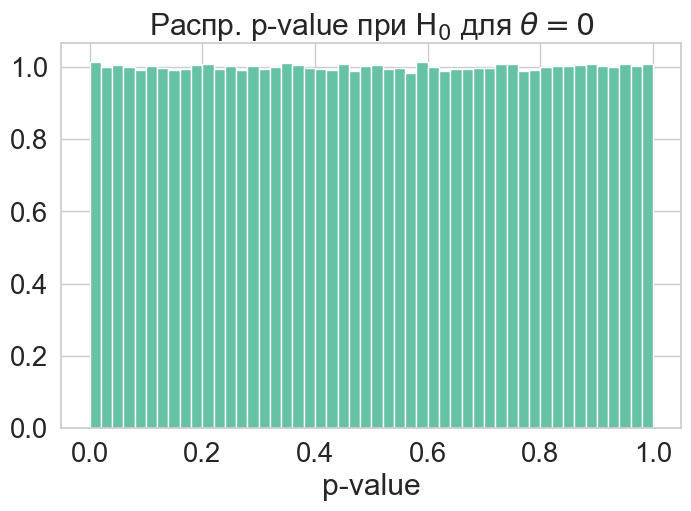

In [12]:
sample_size = 100  # размер выборки
sample_count = 10**6  # количество выборок

samples = sps.norm.rvs(size=(sample_count, sample_size))  # множество выборок
Z_stats = samples.sum(axis=1)  # статистика для каждой из выборок
pvalues = sps.norm(scale=np.sqrt(sample_size)).sf(Z_stats)  # p-value для каждой из выборок

plt.figure(figsize=(8, 5))
plt.title('Распр. p-value при $\\mathsf{H}_0$ для $\\theta = 0$')

plt.hist(pvalues, bins=50, density=True)
plt.xlabel('p-value')
plt.show()

Как известно, критерий не меняется при рассмотрении сложной основной гипотезы $\mathsf{H}_0\colon\ \theta \leqslant 0\ \ vs.\ \ \mathsf{H}_1\colon\ \theta\ > 0$.

Повторите эксперимент для истинного $\theta=-0.1$.

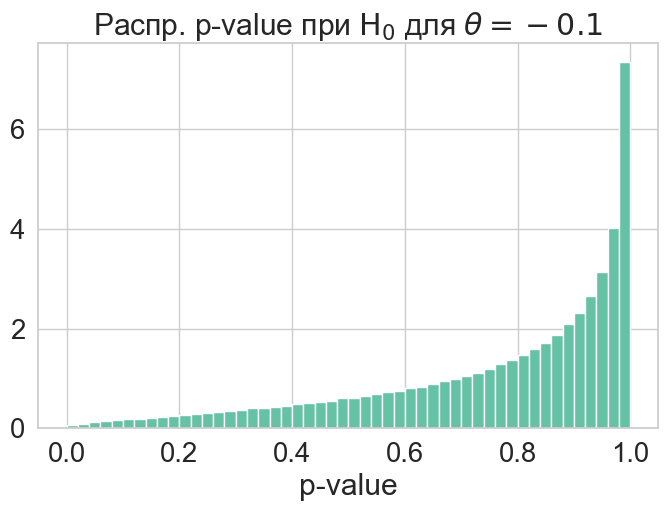

In [13]:
# генерация выборки
samples = sps.norm(loc=-0.1).rvs(size=(sample_count, sample_size))
# статистика для каждой из выборок
Z_stats = samples.sum(axis=1)
# p-value для каждой из выборок
pvalues = sps.norm(scale=np.sqrt(sample_size)).sf(Z_stats)

plt.figure(figsize=(8, 5))
plt.title('Распр. p-value при $\\mathsf{H}_0$ для $\\theta=-0.1$')

plt.hist(pvalues, bins=50, density=True)
plt.xlabel('p-value')
plt.show()

*Замечание.* Подобный эффект все равно не дает оснований говорить об уверенности $\mathsf{H}_0$, поскольку критерий может быть недостаточно мощным.

Проверьте, как ведет себя p-value для альтернативы, рассмотрев истинную $\theta=0.1$.

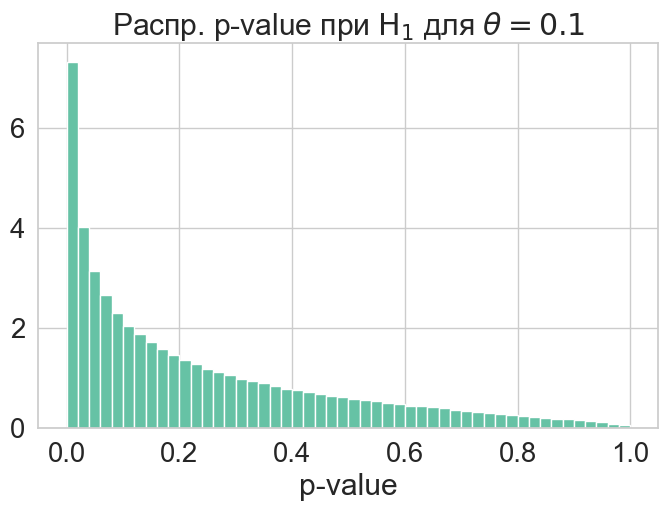

In [14]:
# генерация выборки
samples = sps.norm(loc=0.1).rvs(size=(sample_count, sample_size))
# статистика для каждой из выборок
Z_stats = samples.sum(axis=1)
# p-value для каждой из выборок
pvalues = sps.norm(scale=np.sqrt(sample_size)).sf(Z_stats)

plt.figure(figsize=(8, 5))
plt.title('Распр. p-value при $\\mathsf{H}_1$ для $\\theta=0.1$')

plt.hist(pvalues, bins=50, density=True)
plt.xlabel('p-value')
plt.show()

Чему соответствует доля случаев, в которых p-value меньше 0.05?

При pvalue меньше 0.05 мы отвергаем гипотезу $\mathsf{H}_0$, в нашем эксперименте справедлива альтернатива, поэтому эта доля есть то же самое, что и мощность.

**Вывод:** При использовании понятия pvalue нужно быть аккуратным. Если $\mathsf{H}_0$ не отвергается, то ничего сказать нельзя, p-value не есть степень уверенности в справедливости $\mathsf{H}_0$. Если p-value большое, то может быть такое, что $\mathsf{H}_0$ верно, а может и то, что у нас просто недостаточно мощный критерий.

__________________
### Задача P3.

На лекциях и семинарах были разобраны следующие критерии проверки нормальности:
* Колмогорова;
* Жарка-Бера;
* Шапиро-Уилка.

Cуществует модификация критерия Колмогорова для проверки нормальности — <a href="https://ru.wikipedia.org/wiki/Критерий_Лиллиефорса"> Критерий Лиллиефорса.</a> При решении задачи можете воспользоваться им, например, взяв реализацию из библиотеки `statsmodels`: <a href="https://www.statsmodels.org/stable/generated/statsmodels.stats.diagnostic.lilliefors.html">`statsmodels.stats.diagnostic.lilliefors`</a>, или же применять для конкретной $F_0$ критерий Колмогорова, пример использования которого можно найти в ноутбуке с лекции.

**1.** Данные критерии являются асимптотическими, и их реальное значение уровня значимости может отличаться от желаемого числа $\alpha=0.05$. На семинарах разобран метод оценки реального уровня значимости критерия. Посчитайте реальный уровень значимости этих критериев для размеров выборки от 5 до 100.

*Подсказка:*

Ваша реализация:

In [20]:
sample_size = 100  # размер выборки
sample_count = 10_000  # количество выборок
alpha = 0.05  # уровень значимости

# массивы для результатов
is_reject_ks = np.zeros((sample_size, sample_count))
is_reject_shapiro = np.zeros((sample_size, sample_count))
is_reject_jb = np.zeros((sample_size, sample_count))

for i in tqdm(range(sample_size)):
    for j in range(sample_count):
        sample = sps.norm.rvs(size=i + 3)
        is_reject_ks[i, j] = sps.kstest(sample, cdf='norm')[1] < alpha
        is_reject_shapiro[i, j] = sps.shapiro(sample)[1] < alpha
        is_reject_jb[i, j] = sps.jarque_bera(sample)[1] < alpha

  0%|          | 0/100 [00:00<?, ?it/s]

Поясните, почему вы выбрали такое значение `sample_count`.

**Ответ:** Задача с семинара &mdash; чтобы обеспечить точность $0.05\pm0.001$ нужно взять порядка $200000$ итераций. Тут в решении берется меньше, поскольку считается долго. В работе в теоретических пояснениях хотелось бы $200000$, в реализации не меньше $10^4$</i>

Нарисуйте на одном графике зависимость реального уровня значимости от размера выборки для каждого критерия. Пунктиром отметьте уровень 0.05. Не забудьте добавить легенду и подписать оси.

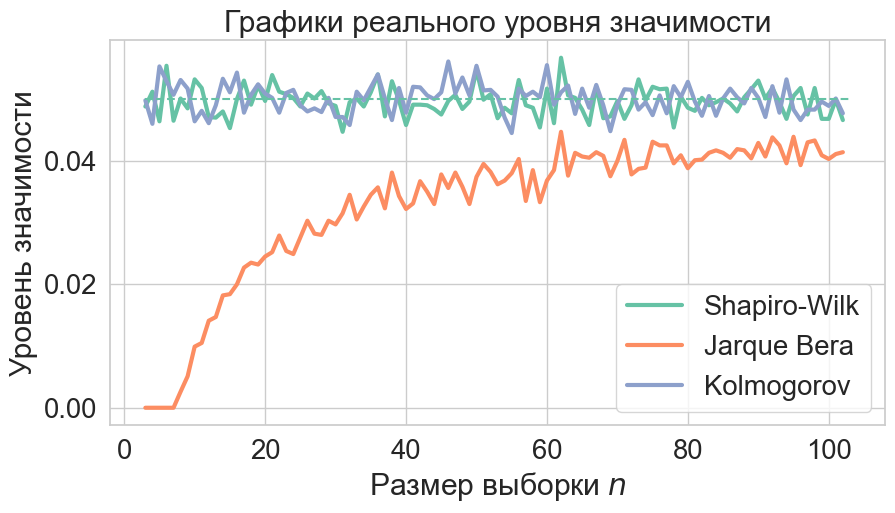

In [21]:
plt.figure(figsize=(10, 5))
plt.title('Графики реального уровня значимости')
time = np.arange(sample_size) + 3  # разные размеры выборок для графика

plt.plot(time, is_reject_shapiro.mean(axis=1), 
         label='Shapiro-Wilk', lw=3)
plt.plot(time, is_reject_jb.mean(axis=1), 
         label='Jarque Bera', lw=3)
plt.plot(time, is_reject_ks.mean(axis=1), 
         label='Kolmogorov', lw=3)

plt.ylabel('Уровень значимости')
plt.xlabel('Размер выборки $n$')
plt.hlines(0.05, 3, 103, linestyles='--')
plt.legend();

Какой можно сделать вывод?

**Ответ:** Реальный уровень значимости Жарка-Бера меньше заданного уровня значимости, т.к. критерий асимптотический. Для остальных он в целом соответствует заданному.

**2.** Аналогичным образом можно вычислять мощность критерия. Вычислите мощности критериев для размеров выборки от 5 до 100, если альтернативная гипотеза заключается в том, что выборка имеет стандартное распределение Коши. Иначе говоря, для критерия $S$ надо приближенно посчитать $\beta_S(\mathsf{P})$, где $\mathsf{P}$ — стандартное распределение Коши.

Нарисуйте на одном графике зависимость мощности критерия от размера выборки для каждого критерия. Не забудьте добавить легенду и подписать оси.


In [22]:
sample_size = 100  # размер выборки
sample_count = 10000  # количество выборок
alpha = 0.05  # уровень значимости

# массивы для результатов
is_reject_ks = np.zeros((sample_size, sample_count))
is_reject_shapiro = np.zeros((sample_size, sample_count))
is_reject_jb = np.zeros((sample_size, sample_count))

for i in tqdm(range(sample_size)):
    for j in range(sample_count):
        sample = sps.cauchy.rvs(size=i+3)
        is_reject_ks[i, j] = sps.kstest(sample, cdf='norm')[1] < alpha
        is_reject_shapiro[i, j] = sps.shapiro(sample)[1] < alpha
        is_reject_jb[i, j] = sps.jarque_bera(sample)[1] < alpha

  0%|          | 0/100 [00:00<?, ?it/s]

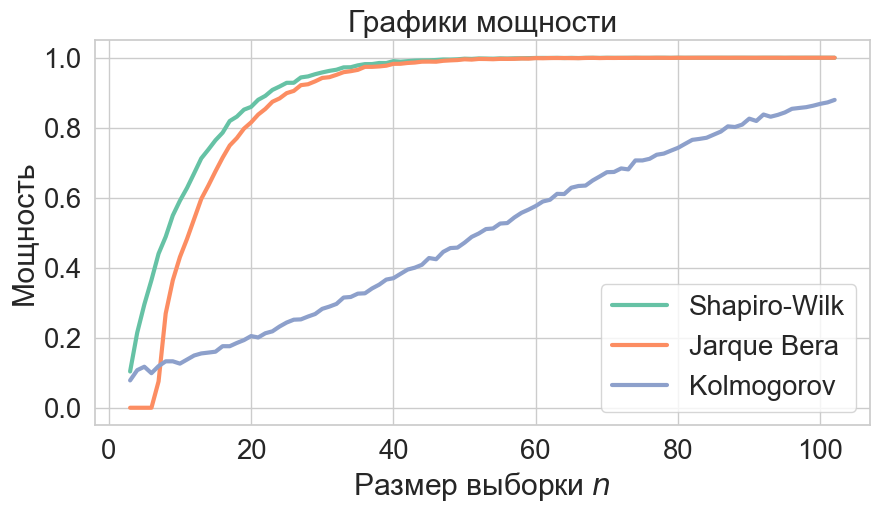

In [23]:
plt.figure(figsize=(10, 5))
plt.title('Графики мощности')

plt.plot(time, is_reject_shapiro.mean(axis=1), 
         label='Shapiro-Wilk', lw=3)
plt.plot(time, is_reject_jb.mean(axis=1), 
         label='Jarque Bera', lw=3)
plt.plot(time, is_reject_ks.mean(axis=1), 
         label='Kolmogorov', lw=3)

plt.ylabel('Мощность')
plt.xlabel('Размер выборки $n$')
plt.legend();

Сделайте вывод. Какой критерий является наиболее мощным при данной альтернативе?

**Ответ:** Самый мощный &mdash; Шапиро-Уилка, критерий Жарка-Бера не сильно хуже по мощности, а критерий Колмогорова слабый.

**3.** Распределение Стьюдента является в некотором смысле обобщением нормального распределения (при бесконечном количестве степеней свободы) и распределения Коши (при одной степени свободы). 
Посчитайте приближенно мощности критериев для выборки размера 50 если альтернатива заключается в том, что выборка имеет распределение Стьюдента. Поскольку мощность критерия является функцией от распределения из альтернативной гипотезы, вам нужно посчитать функцию. Посчитайте её значения для целых значений степени свободы от 1 до 10.

Нарисуйте на одном графике зависимость мощности критерия от количества степеней свободы для каждого критерия. Не забудьте добавить легенду и подписать оси.

In [24]:
sample_size = 100  # размер выборки
sample_count = 10000  # количество выборок
alpha = 0.05  # уровень значимости

param_count = 10  # степени свободы для Стьюдента
# массивы для результатов
is_reject_ks = np.zeros((param_count, sample_count))
is_reject_shapiro = np.zeros((param_count, sample_count))
is_reject_jb = np.zeros((param_count, sample_count))

for i in tqdm(range(param_count)):
    for j in range(sample_count):
        sample = sps.t(df=i + 1).rvs(size=50)
        is_reject_ks[i, j] = sps.kstest(sample, cdf='norm')[1] < alpha
        is_reject_shapiro[i, j] = sps.shapiro(sample)[1] < alpha
        is_reject_jb[i, j] = sps.jarque_bera(sample)[1] < alpha

  0%|          | 0/10 [00:00<?, ?it/s]

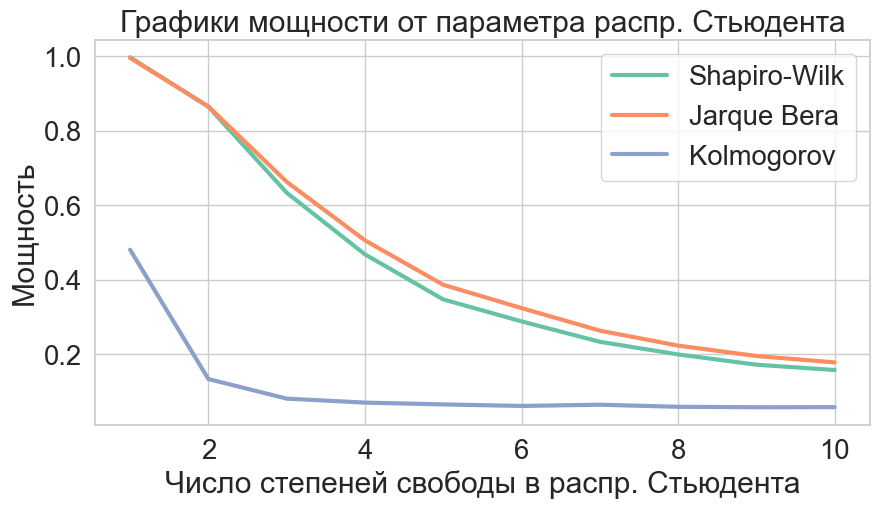

In [25]:
plt.figure(figsize=(10, 5))
plt.title('Графики мощности от параметра распр. Стьюдента')

plt.plot(np.arange(param_count)+1, is_reject_shapiro.mean(axis=1), 
         label='Shapiro-Wilk', lw=3)
plt.plot(np.arange(param_count)+1, is_reject_jb.mean(axis=1), 
         label='Jarque Bera', lw=3)
plt.plot(np.arange(param_count)+1, is_reject_ks.mean(axis=1), 
         label='Kolmogorov', lw=3)

plt.ylabel('Мощность')
plt.xlabel('Число степеней свободы в распр. Стьюдента')
plt.legend();

Сделайте вывод относительно мощности критерия при разных распределениях из альтернативы.

**Вывод:** Мощность всех критериев уменьшается с ростом степеней свободы, так как распределение Стьюдента всё больше начинает быть похожим на нормальное. При этом при $n=1$(это распр. Коши) мощности кр. Шапиро-Уилка и Жарка-Бера равны единице.

___
### Задача P4. 
Студенты периодически отправляют запросы в бот. Иногда бот бывает недоступен,
поэтому студенты с некоторыми интервалами повторяют запросы до тех пор, пока
бот не ответит. Известно, что $52$ запроса дошли с первой попытки, $31$ &mdash; со второй, $3$
&mdash; с третьей, а для доставки еще $5$ запросов потребовалось более $4$ попыток. Верно
ли, что бот получает запросы с вероятностью $\frac{2}{3}$?

**Решение:**

Рассматривается модель геометрического распределения с вероятностью успеха $p = \frac{2}{3}$. Будем использовать критерий хи-квадрат.

После проверки условий применимости и объедениния двух последних ячеек получаем три ячейки со значениями $1, 2$ и $\geq 3$. Соответствующие $p_j^0$ равны $p_0$, $p_j^0(1 - p_0)$ и $1 - p_0 - p_0(1 - p_0)$ соответственно, а значения $\mu_j$ &mdash; $52$, $31$ и $8$. При этом значения $np_j^0$ получаются следующими:  $60.7, 20.2, 10.1$.

In [27]:
sps.chisquare([52, 31, 8], [60.7, 20.2, 10.1])

Power_divergenceResult(statistic=7.45784331316163, pvalue=0.024018722308085848)

**Вывод:** Соответствующая гипотеза о том, что бот получает запросы с вероятностью $\frac{2}{3},$ отвергается.

____
### Задача P5.

С помощью критерия хи-квадрат вам нужно проверить, правильно ли `scipy.stats` генерирует случайные величины. 

**1.** Реализуйте критерий для генерации выборки $U\{1, ..., 10\}$, аналогично разобранному на семинаре. Тем самым проверьте, что `sps.randint` действительно генерирует выборку из равномерного распределения.

**2.** Проверьте, действительно ли код `sps.poisson(mu=5).rvs(size=1000)` генерирует выборку размера 1000 из пуассоновского распределения с параметром 5. 

**Указания**
1. Не забудьте учесть условия применимости критерия хи-квадрат;
2. Для вычисления плотности воспользуйтесь `sps.poisson(mu=5).pmf`;
3. Для подсчета количества элементов в разбиении на множества воспользуйтесь `np.unique(sample, return_counts=True)`;
4. Не нужно писать сколь-либо универсальный код, который одним нажатием кнопки проверяет гипотезу с учетом всех условий применимости критерия. Расписывайте код поэтапно, на каждый логический этап свой код в отдельной ячейке для *конкретной* реализации выборки. Так вам проще реализовать, а нам проще проверять.

**Решение:**

In [1]:
from collections import Counter

**Пункт 1.**

In [35]:
sample = sps.randint(low=0, high=10).rvs(size=1000)  # генерация выборки
# подсчет количества вхождений элемента из U{1, ..., 10}
f_obs = np.array(list(Counter(sample).values()))
# применяем критерий
sps.chisquare(f_obs)

Power_divergenceResult(statistic=7.420000000000001, pvalue=0.5934781133860383)

Таким образом, $\mathsf{H}_0$ не отвергается

**Пункт 2.**

In [48]:
sample = sps.poisson(mu=5).rvs(size=1000)  # генерация выборки
# посмотрим на уникальные значения и их количество
np.unique(sample, return_counts=True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 array([  7,  41,  80, 138, 169, 181, 143, 120,  45,  43,  16,  10,   4,
          2,   1]))

Посмотрим, выполняются ли условия применимости.

In [49]:
sps.poisson(mu=5).pmf(np.unique(sample)) * 1000

array([  6.737947  ,  33.689735  ,  84.22433749, 140.37389581,
       175.46736977, 175.46736977, 146.22280814, 104.44486296,
        65.27803935,  36.26557742,  18.13278871,   8.24217669,
         3.43424029,   1.32086165,   0.4717363 ])

Объединим последние редкие значения в один интервал.

In [50]:
# ожидаемое число элементов в каждом из интервалов,
# c учетом объединения в один интервало редких значений
f_exp = sps.poisson(mu=5).pmf(np.arange(12)) * 1000
f_exp[-1] += sps.poisson(mu=5).sf(11) * 1000

# число элементов, которые попали в каждый из интервал,
# выборку обрезаем, т.к. объединяем последние значения
sample[sample > 11] = 11
f_obs = np.unique(sample, return_counts=True)[1]

Применим критерий.

In [51]:
sps.chisquare(f_obs, f_exp)

Power_divergenceResult(statistic=13.247019622030173, pvalue=0.27748745229159505)

**Вывод:**

Использовав критерий хи-квадрат в условиях его применимости, можно убедиться, что `scipy.stats` скорее всего верно генерирует случайные величины из разных распределений, т.к. оба раза соответствующие гипотезы мы не отвергали